In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

import torch.nn as nn
import torch.optim as optim

from LFWDataset import LFWDataset
from SiameseNet import SiameseNet

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(), 
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = LFWDataset(train=True)
trainloader = DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = LFWDataset(test=True)
testloader = DataLoader(testset, batch_size=4, shuffle=True, num_workers=2)


In [4]:
net = SiameseNet().cuda()

In [5]:
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-6
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

In [6]:
%matplotlib inline
def show(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')
    plt.show()

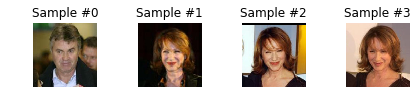

In [7]:
fig = plt.figure()

for i in range(len(trainset)):
    sample = trainset[i]
    
    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    ax.imshow(sample[...,::-1])

    if i == 3:
        plt.show()
        break

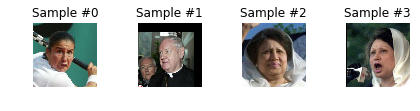

In [9]:
fig = plt.figure()

for i in range(len(testset)):
    sample = testset[i]
    
    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    ax.imshow(sample[...,::-1])

    if i == 3:
        plt.show()
        break